## Main Goal
Clustering credit cards based on their buying habits, credit limits, and many other financial factors!  
**Credit Cards Clustering** or **Credit Cards Segmentation**

### Data Understanding
The Sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.  
The dataset has the following features:  
1. **CUST_ID**: Identification of Credit Card holder (Categorical)
2. **BALANCE**: Balance amount left in their account to make purchases 
3. **BALANCE_FREQUENCY**: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. **PURCHASES**: Amount of purchases made from account
5. **ONEOFF_PURCHASES**: Maximum purchase amount done in one-go
6. **INSTALLMENTS_PURCHASES**: Amount of purchase done in installment
7. **CASH_ADVANCE**: Cash in advance given by the user
8. **PURCHASES_FREQUENCY**: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. **ONEOFFPURCHASESFREQUENCY**: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. **PURCHASESINSTALLMENTSFREQUENCY**: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. **CASHADVANCEFREQUENCY**: How frequently the cash in advance being paid
12. **CASHADVANCETRX**: Number of Transactions made with "Cash in Advanced"
13. **PURCHASES_TRX**: Number of purchase transactions made
14. **CREDIT_LIMIT**: Limit of Credit Card for user
15. **PAYMENTS**: Amount of Payment done by user
16. **MINIMUM_PAYMENTS**: Minimum amount of payments made by user
17. **PRCFULLPAYMENT**: Percent of full payment paid by user
18. **TENURE**: Tenure of credit card service for user

The dataset has the 8950 observations & 18 features!  
The dataset can be accessed on: [https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data]

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("datasets/CCards.csv")

In [3]:
dataset.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
dataset.shape

(8950, 18)

In [6]:
dataset.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Exploratory Data Analysis
#### Are customers with missing minimum payments showing a PRC_FULL_PAYMENT of 1?

In [7]:
missing_min_payments = dataset[dataset['MINIMUM_PAYMENTS'].isna()]

In [8]:
full_payment_count = missing_min_payments[missing_min_payments['PRC_FULL_PAYMENT'] == 1].shape[0]
total_missing_min_payments = missing_min_payments.shape[0]
percentage_full_payment = (full_payment_count / total_missing_min_payments) * 100

In [9]:
print(f"Number of customers with missing minimum payments: {total_missing_min_payments}")
print(f"Number of these customers with PRC_FULL_PAYMENT = 1: {full_payment_count}")
print(f"Percentage of these customers with PRC_FULL_PAYMENT = 1: {percentage_full_payment:.2f}%")

Number of customers with missing minimum payments: 313
Number of these customers with PRC_FULL_PAYMENT = 1: 0
Percentage of these customers with PRC_FULL_PAYMENT = 1: 0.00%


#### Do customers with missing minimum payments have zero balances or zero purchases?

In [10]:
# Check if these customers have zero balances
zero_balances = missing_min_payments[missing_min_payments['BALANCE'] == 0].shape[0]
total_customers_with_missing_min_payment = missing_min_payments.shape[0]

print(f"Number of customers with missing minimum payments and zero balance: {zero_balances}")
print(f"Percentage of these customers with zero balance: {(zero_balances / total_customers_with_missing_min_payment) * 100:.2f}%")

Number of customers with missing minimum payments and zero balance: 74
Percentage of these customers with zero balance: 23.64%


In [11]:
# Check if these customers have zero purchases
zero_purchases = missing_min_payments[missing_min_payments['PURCHASES'] == 0].shape[0]

print(f"Number of customers with missing minimum payments and zero purchases: {zero_purchases}")
print(f"Percentage of these customers with zero purchases: {(zero_purchases / total_customers_with_missing_min_payment) * 100:.2f}%")

Number of customers with missing minimum payments and zero purchases: 76
Percentage of these customers with zero purchases: 24.28%


#### Is there a pattern between the missing values and TENURE or CREDIT_LIMIT?

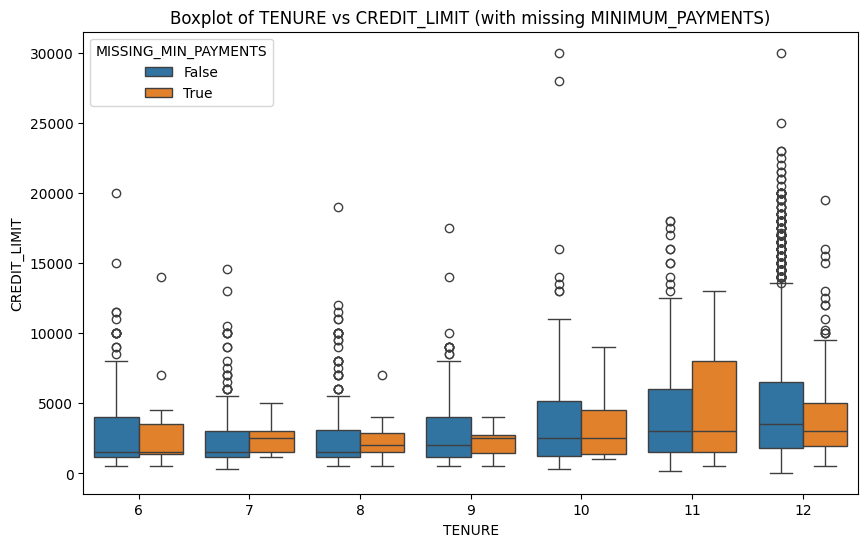

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TENURE', y='CREDIT_LIMIT', hue=dataset['MINIMUM_PAYMENTS'].isnull(), data=dataset)
plt.title('Boxplot of TENURE vs CREDIT_LIMIT (with missing MINIMUM_PAYMENTS)')
plt.legend(title='MISSING_MIN_PAYMENTS')
plt.show()

> Tenure <= 10:The similarity in the box ranges (IQRs) suggests that there is no significant difference in the distribution of TENURE between customers with missing minimum payments and those without. It implies that having missing minimum payments does not affect the tenure length for these customers.  
> Tenure 11: The slightly larger box for customers with missing minimum payments indicates more variability in tenure among these customers compared to those without missing payments. However, since the mean is the same, it suggests that the central tendency (average tenure) is unaffected.  
> Tenure 12: The slightly larger box for customers without missing minimum payments indicates more variability in tenure for these customers. The similar mean suggests that, again, the average tenure is not impacted by whether the minimum payment is missing or not.  
> Outliers: The presence of more outliers in the boxes of customers without missing minimum payments indicates that there are more extreme values in tenure among these customers. It could imply that customers who do not have missing minimum payments may have more diverse experiences with the credit card service duration.

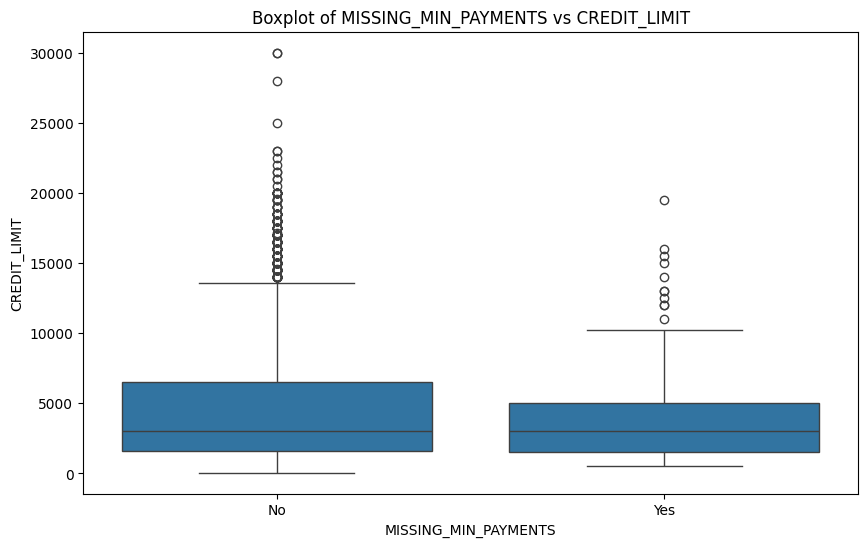

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['MINIMUM_PAYMENTS'].isnull(), y='CREDIT_LIMIT', data=dataset)
plt.title('Boxplot of MISSING_MIN_PAYMENTS vs CREDIT_LIMIT')
plt.xlabel('MISSING_MIN_PAYMENTS')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

> Box size and mean: The larger box for customers without missing minimum payments suggests greater variability in credit limits among these customers. Since both boxes have almost the same mean value, it indicates that the average credit limit is similar for both groups. However, the spread of values (variability) is greater for customers without missing minimum payments.

> Tenure and Credit Limit: Both analyses suggest that the presence of missing minimum payments does not significantly impact the central tendencies (mean) of TENURE and CREDIT_LIMIT. However, the variability (spread of data) seems to be greater among customers without missing minimum payments.

#### Are the missing entries associated with high CASH_ADVANCE amounts?

In [14]:
cash_advance_customers = missing_min_payments[missing_min_payments['CASH_ADVANCE'] > 0.0]
num_cash_advance_customers = cash_advance_customers.shape[0]
total_missing_min_payments = missing_min_payments.shape[0]

print(f"Number of customers with missing minimum payments and cash advance amounts > 0.0: {num_cash_advance_customers}")
print(f"Percentage of these customers with cash advance amounts > 0.0: {(num_cash_advance_customers / total_missing_min_payments) * 100:.2f}%")

Number of customers with missing minimum payments and cash advance amounts > 0.0: 116
Percentage of these customers with cash advance amounts > 0.0: 37.06%


In [15]:
avg_cash_advance = cash_advance_customers['CASH_ADVANCE'].mean()
median_cash_advance = cash_advance_customers['CASH_ADVANCE'].median()
max_cash_advance = cash_advance_customers['CASH_ADVANCE'].max()

print(f"Average cash advance amount among customers with missing minimum payments: {avg_cash_advance:.2f}")
print(f"Median cash advance amount among customers with missing minimum payments: {median_cash_advance:.2f}")
print(f"Maximum cash advance amount among customers with missing minimum payments: {max_cash_advance:.2f}")

Average cash advance amount among customers with missing minimum payments: 1508.71
Median cash advance amount among customers with missing minimum payments: 1012.73
Maximum cash advance amount among customers with missing minimum payments: 7616.06


#### Distribution of Minimum Payments feature

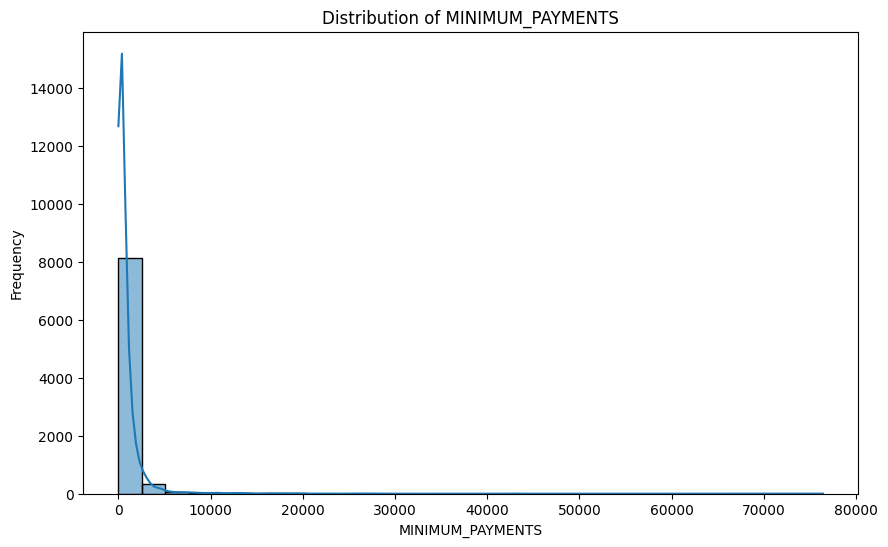

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['MINIMUM_PAYMENTS'], bins=30, kde=True)
plt.title('Distribution of MINIMUM_PAYMENTS')
plt.xlabel('MINIMUM_PAYMENTS')
plt.ylabel('Frequency')
plt.show()

#### Dealing with Null Values in Minimum_Payments feature 
> Based on the fact that data is very right skewed, and Given that about 24% of customers with missing minimum payments have zero balances or purchases, consider imputing missing values based on customer segments.

In [17]:
# Condition 1: Customers with 'PURCHASES' == 0 OR 'PAYMENTS' == 0
dataset.loc[(dataset['MINIMUM_PAYMENTS'].isna()) & ((dataset['PURCHASES'] == 0) | (dataset['PAYMENTS'] == 0)), 'MINIMUM_PAYMENTS'] = 0

# Condition 2: Customers with 'BALANCE' == 0 AND 'PURCHASES' == 0
dataset.loc[(dataset['MINIMUM_PAYMENTS'].isna()) & (dataset['BALANCE'] == 0) & (dataset['PURCHASES'] == 0), 'MINIMUM_PAYMENTS'] = 0

In [18]:
# Calculate the median value of MINIMUM_PAYMENTS
median_min_payments = dataset['MINIMUM_PAYMENTS'].median()

# Condition 3: Customers with 'BALANCE' == 0 AND 'PURCHASES' > 0
dataset.loc[(dataset['MINIMUM_PAYMENTS'].isna()) & (dataset['BALANCE'] == 0) & (dataset['PURCHASES'] > 0), 'MINIMUM_PAYMENTS'] = median_min_payments

# Condition 4: Indices of remaining missing 'MINIMUM_PAYMENTS'
dataset.loc[dataset['MINIMUM_PAYMENTS'].isna(), 'MINIMUM_PAYMENTS'] = median_min_payments

In [19]:
# Dropping the single null value in 'CREDIT_LIMIT'
# Remove the observation with null value in 'CREDIT_LIMIT'
dataset = dataset.dropna(subset=['CREDIT_LIMIT'])

In [20]:
# Check for missing values again!
dataset.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### What is the distribution of balance amounts among credit card holders?

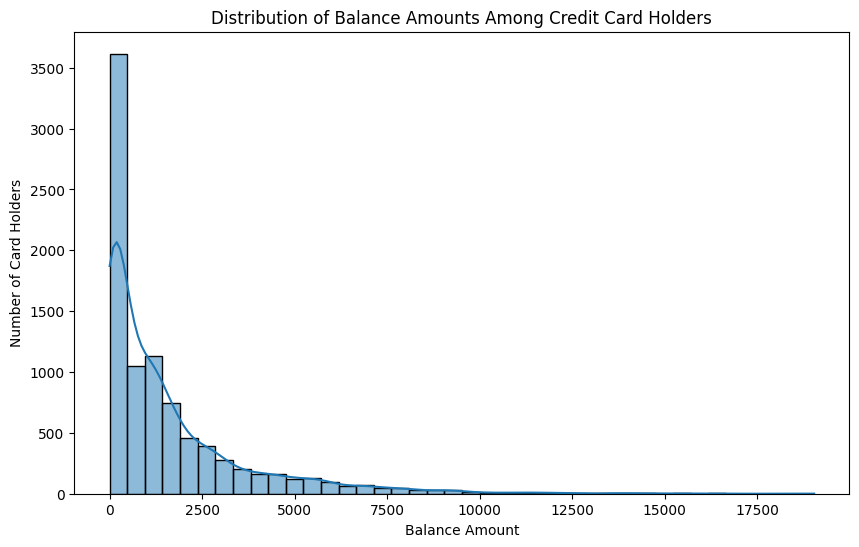

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(dataset['BALANCE'], bins=40, kde=True)
plt.title('Distribution of Balance Amounts Among Credit Card Holders')
plt.xlabel('Balance Amount')
plt.ylabel('Number of Card Holders')
plt.show()

> Most of the cards have under 2500 balance amount! The plot shows the data is very right skewed!

In [22]:
# Create Customer Segments Based On Balance Amounts
dataset['Balance_Segment'] = pd.qcut(dataset['BALANCE'], q=3, labels=['Low', 'Medium', 'High'])

#### How frequently are balances updated across different customer segments?

In [23]:
# Group by the segments and calculate the mean balance frequency
balance_freq_segment = dataset.groupby('Balance_Segment', observed=False)['BALANCE_FREQUENCY'].mean().reset_index()

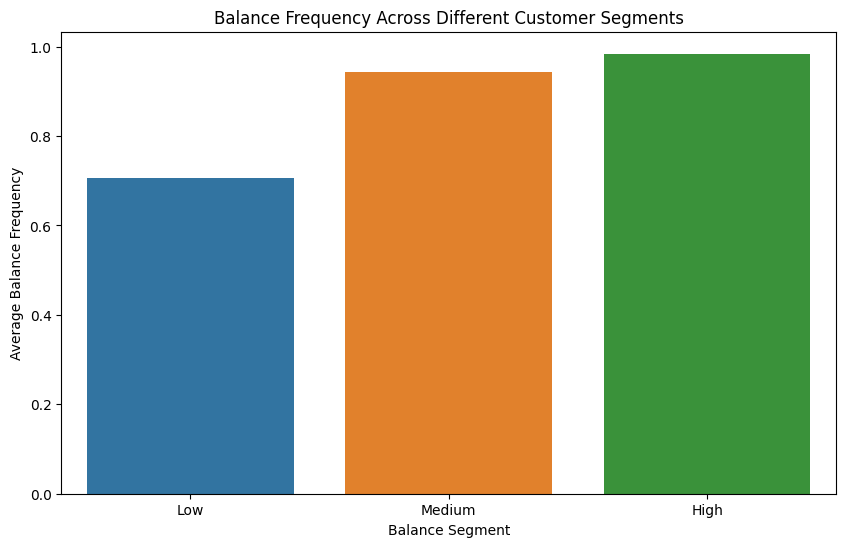

In [24]:
# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x='Balance_Segment', y='BALANCE_FREQUENCY', data=balance_freq_segment, hue='Balance_Segment')
plt.title('Balance Frequency Across Different Customer Segments')
plt.xlabel('Balance Segment')
plt.ylabel('Average Balance Frequency')
plt.show()

> High Balance Segment hits almost 1.0 average balance frequency, Medium balance segment is around 0.95 average balance frequency and Low balance segment is around 0.7 average balance frequency!

#### What are the common purchase patterns (total purchases, one-off purchases, installment purchases)?

In [25]:
# 4. **PURCHASES**: Amount of purchases made from account
# 5. **ONEOFF_PURCHASES**: Maximum purchase amount done in one-go
# 6. **INSTALLMENTS_PURCHASES**: Amount of purchase done in installment
summary_stats = dataset[['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']].describe()
print(summary_stats)

          PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES
count   8949.000000       8949.000000             8949.000000
mean    1003.316936        592.503572              411.113579
std     2136.727848       1659.968851              904.378205
min        0.000000          0.000000                0.000000
25%       39.800000          0.000000                0.000000
50%      361.490000         38.000000               89.000000
75%     1110.170000        577.830000              468.650000
max    49039.570000      40761.250000            22500.000000


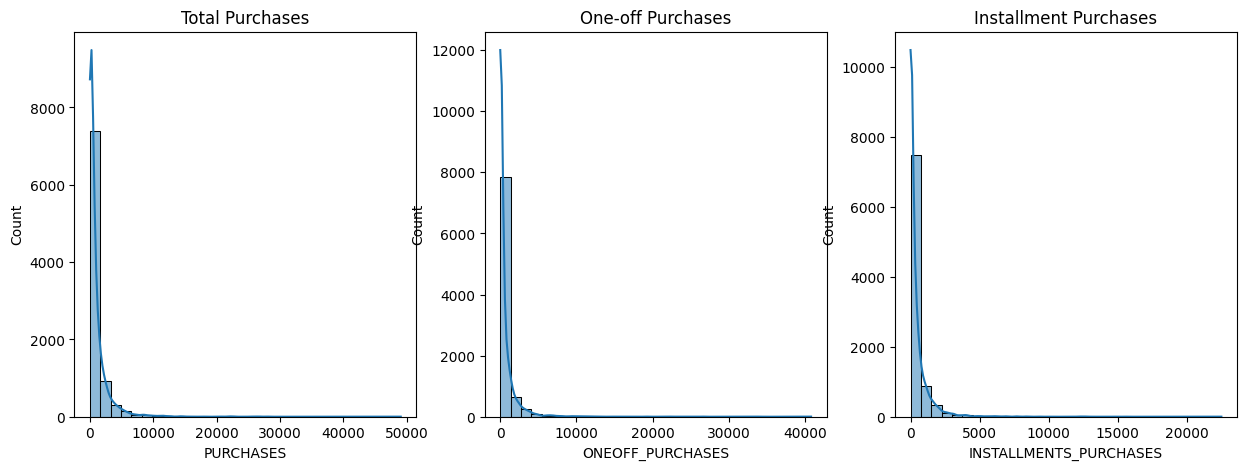

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.histplot(dataset['PURCHASES'], bins=30, kde=True)
plt.title('Total Purchases')

plt.subplot(1, 3, 2)
sns.histplot(dataset['ONEOFF_PURCHASES'], bins=30, kde=True)
plt.title('One-off Purchases')

plt.subplot(1, 3, 3)
sns.histplot(dataset['INSTALLMENTS_PURCHASES'], bins=30, kde=True)
plt.title('Installment Purchases')

plt.show()

> The all three graphs of "total purchases", "one-off purchases" and "installment purchases" look the same, they are right skewed. Most customers are under 2500 in purchases, oneoff_purchases and installments_purchases!

#### What is the distribution of cash advances among customers?

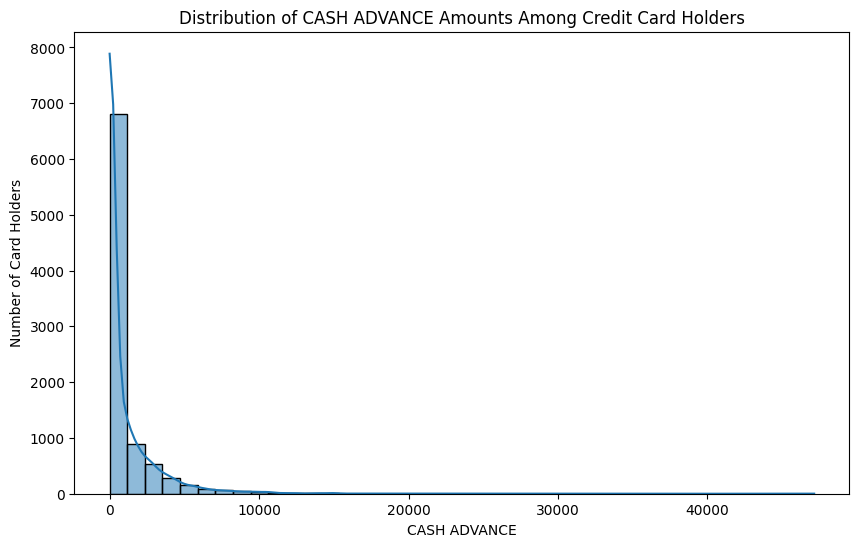

In [27]:
# **CASH_ADVANCE**: Cash in advance given by the user
plt.figure(figsize=(10,6))
sns.histplot(dataset['CASH_ADVANCE'], bins=40, kde=True)
plt.title('Distribution of CASH ADVANCE Amounts Among Credit Card Holders')
plt.xlabel('CASH ADVANCE')
plt.ylabel('Number of Card Holders')
plt.show()

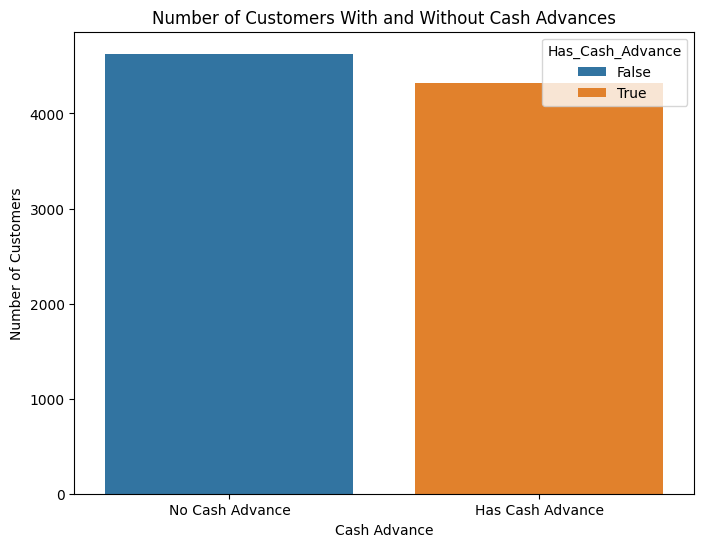

In [28]:
# Group customers into those who have taken cash advances and those who haven't
dataset['Has_Cash_Advance'] = dataset['CASH_ADVANCE'] > 0

# Count the number of customers in each group
cash_advance_counts = dataset['Has_Cash_Advance'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=cash_advance_counts.index, y=cash_advance_counts.values, hue=cash_advance_counts.index)
plt.title('Number of Customers With and Without Cash Advances')
plt.xlabel('Cash Advance')
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['No Cash Advance', 'Has Cash Advance'])
plt.show()

> There are slightly more customer with No cash in advance then the ones with cash in advance! 

#### How frequently do customers make purchases?
7. **CASH_ADVANCE**: Cash in advance given by the user
8. **PURCHASES_FREQUENCY**: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

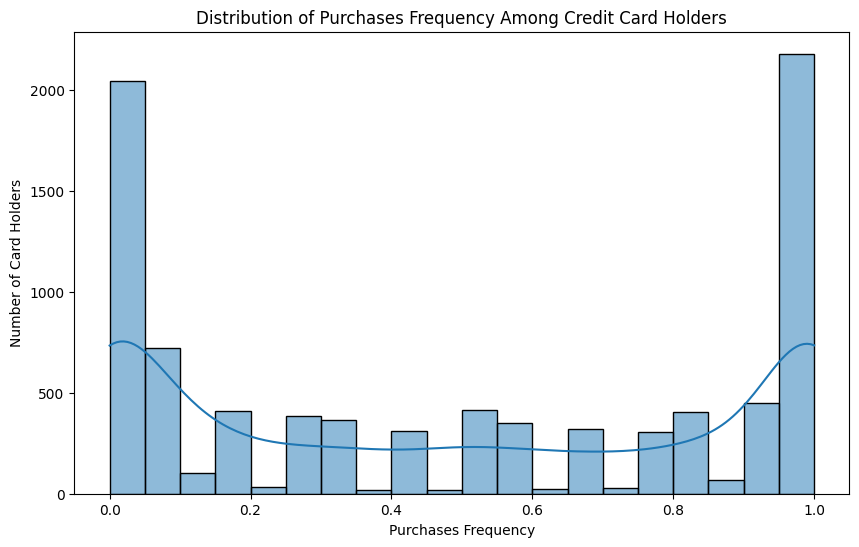

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(dataset['PURCHASES_FREQUENCY'], bins=20, kde=True)
plt.title('Distribution of Purchases Frequency Among Credit Card Holders')
plt.xlabel('Purchases Frequency')
plt.ylabel('Number of Card Holders')
plt.show()

In [30]:
# Define bins and labels
bins = [0, 0.2, 0.5, 0.7, 1.0]
labels = ['0-20%', '20-50%', '50-70%', '70-100%']

# Create a new column for purchase frequency segments
dataset['Purchase_Freq_Segment'] = pd.cut(dataset['PURCHASES_FREQUENCY'], bins=bins, labels=labels)

# Count the number of customers in each segment
purchase_freq_counts = dataset['Purchase_Freq_Segment'].value_counts().sort_index()

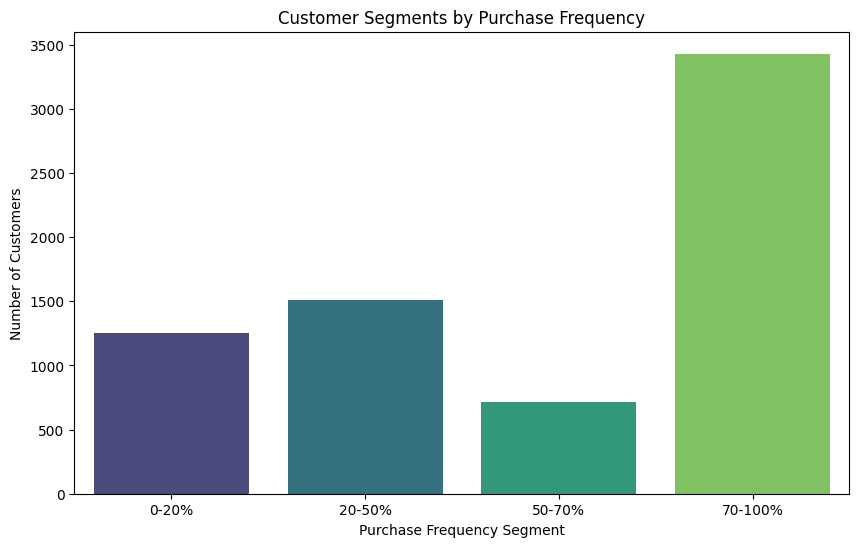

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x=purchase_freq_counts.index, y=purchase_freq_counts.values, hue=purchase_freq_counts.index, palette='viridis')
plt.title('Customer Segments by Purchase Frequency')
plt.xlabel('Purchase Frequency Segment')
plt.ylabel('Number of Customers')
plt.show()

> Most customers are in the 70-100% purchase frequency segment, following by 20-50% and 0-20% segments! The segment with least amount of customers is 50-70%!

#### What is the relationship between credit limit and purchase behavior?
**CREDIT_LIMIT**: Limit of Credit Card for user.

In [32]:
credit_limit_by_segment = dataset.groupby('Purchase_Freq_Segment', observed=False)['CREDIT_LIMIT'].mean().reset_index()

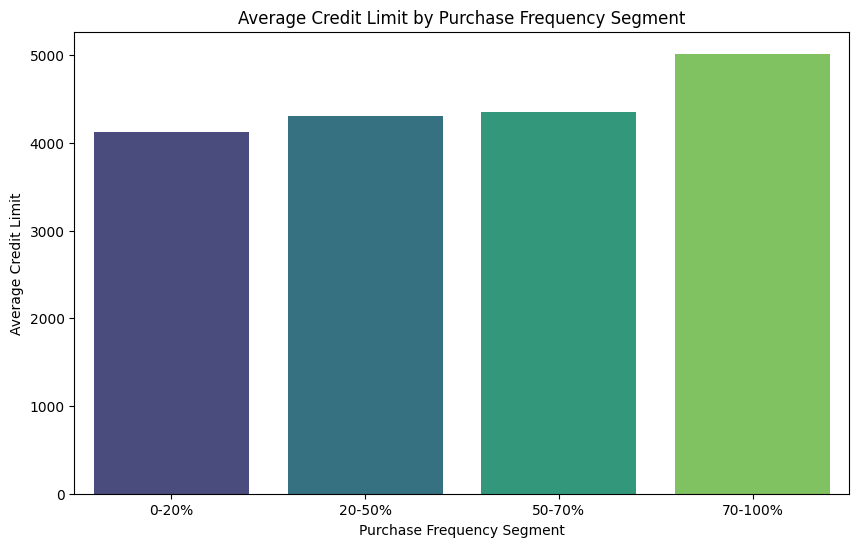

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x='Purchase_Freq_Segment', y='CREDIT_LIMIT', data=credit_limit_by_segment, hue='Purchase_Freq_Segment', palette='viridis')
plt.title('Average Credit Limit by Purchase Frequency Segment')
plt.xlabel('Purchase Frequency Segment')
plt.ylabel('Average Credit Limit')
plt.show()

In [34]:
correlation = dataset['CREDIT_LIMIT'].corr(dataset['PURCHASES_FREQUENCY'])
print(f'Correlation between Credit Limit and Purchase Frequency: {correlation:.2f}')

Correlation between Credit Limit and Purchase Frequency: 0.12


> As the purchase frequency increases, the average credit limits also increases. There is a positive correlation between Credit Limit and Purchase Frequency!

#### What are the payment behaviors (total payments, minimum payments, percent of full payments) of customers?
**PAYMENTS**: Amount of Payment done by user!  
**MINIMUM_PAYMENTS**: Minimum amount of payments made by user!  
**PRCFULLPAYMENT**: Percent of full payment paid by user!  

In [35]:
payment_stats = dataset[['PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']].describe()
print(payment_stats)

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT
count   8949.000000       8949.000000       8949.000000
mean    1733.336511        836.212079          0.153732
std     2895.168146       2335.474817          0.292511
min        0.000000          0.000000          0.000000
25%      383.282850        164.503829          0.000000
50%      857.062706        294.221630          0.000000
75%     1901.279320        788.721609          0.142857
max    50721.483360      76406.207520          1.000000


In [36]:
correlations = dataset[['PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']].corr()
print(correlations)

                  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT
PAYMENTS          1.000000          0.130968          0.112107
MINIMUM_PAYMENTS  0.130968          1.000000         -0.133091
PRC_FULL_PAYMENT  0.112107         -0.133091          1.000000


In [37]:
# Define bins and labels
bins = [0, 0.25, 0.50, 0.75, 1.0]
labels = ['0-25%', '25-50%', '50-75%', '75-100%']

# Create a new column for PRCFULLPAYMENT segments
dataset['Full_Payment_Segment'] = pd.cut(dataset['PRC_FULL_PAYMENT'], bins=bins, labels=labels)

# Calculate the mean of relevant features for each payment segment
segment_analysis = dataset.groupby('Full_Payment_Segment', observed=False)[['PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']].mean().reset_index()

print(segment_analysis)

  Full_Payment_Segment     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT
0                0-25%  2976.513592        567.408736          0.135185
1               25-50%  2105.921006        244.076446          0.396308
2               50-75%  1914.039173        239.906622          0.657281
3              75-100%  2399.530102        186.871612          0.949025


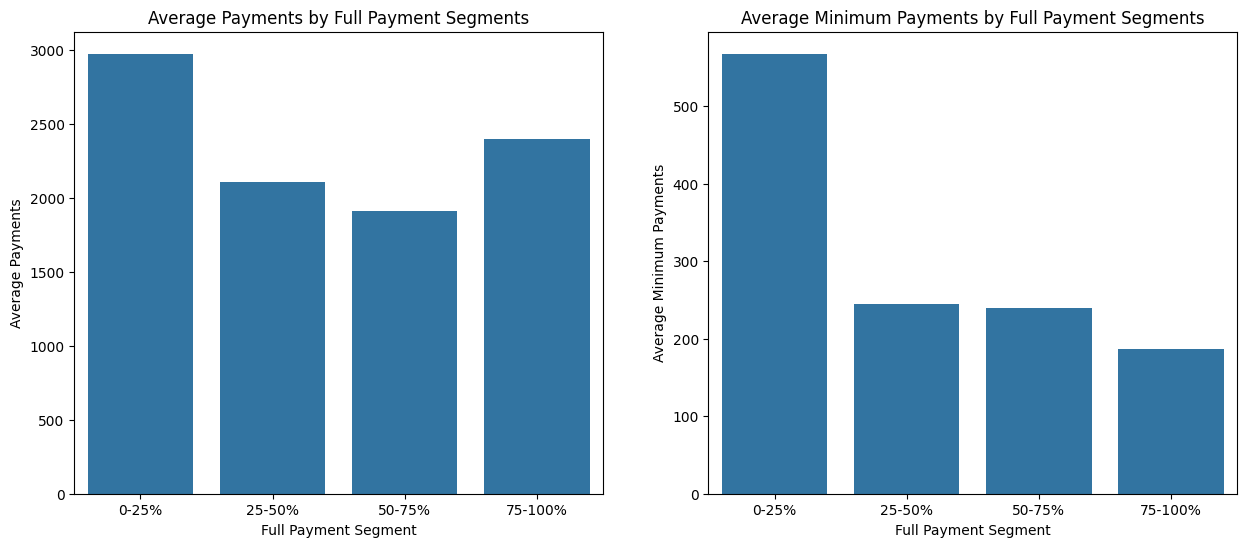

In [38]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
sns.barplot(x='Full_Payment_Segment', y='PAYMENTS', data=segment_analysis)
plt.title('Average Payments by Full Payment Segments')
plt.xlabel('Full Payment Segment')
plt.ylabel('Average Payments')

plt.subplot(1, 2, 2)
sns.barplot(x='Full_Payment_Segment', y='MINIMUM_PAYMENTS', data=segment_analysis)
plt.title('Average Minimum Payments by Full Payment Segments')
plt.xlabel('Full Payment Segment')
plt.ylabel('Average Minimum Payments')

plt.show()

> 0-20% full payment segment has the most customers in 'average payments' and also the most customers in 'average minimum payments'!

#### What are the common characteristics of customers with high balance frequencies, high purchase frequencies, and high cash advance frequencies?

In [39]:
high_balance_freq = dataset[dataset['BALANCE_FREQUENCY'] > 0.5]  
high_purchase_freq = dataset[dataset['PURCHASES_FREQUENCY'] > 0.5]

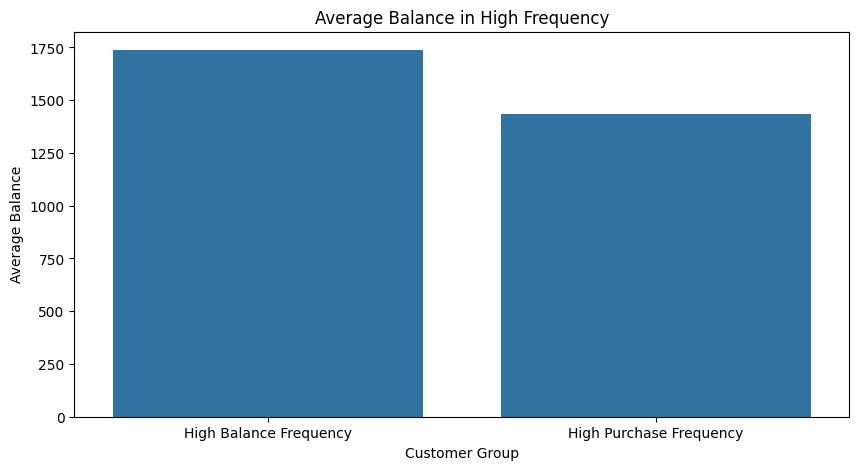

In [40]:
plt.figure(figsize=(10,5))

# Example visualization for average balance in each subset
sns.barplot(x=['High Balance Frequency', 'High Purchase Frequency'],
            y=[high_balance_freq['BALANCE'].mean(), high_purchase_freq['BALANCE'].mean()])
plt.title('Average Balance in High Frequency')
plt.xlabel('Customer Group')
plt.ylabel('Average Balance')
plt.show()


> High Balance Frequency is around 1750 in average balance! High purchase frequency is around 1260 in average balance!

### Clustering Based On Spending Patterns
Cluster based on features such as total purchases, purchase frequency, cash advances, and payment patterns.

In [44]:
# Select the features for clustering
features = ['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY']
dataset_new = dataset[features]

In [45]:
dataset_new.head(2)

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY
0,95.4,0.0,95.4,0.166667
1,0.0,0.0,0.0,0.000000


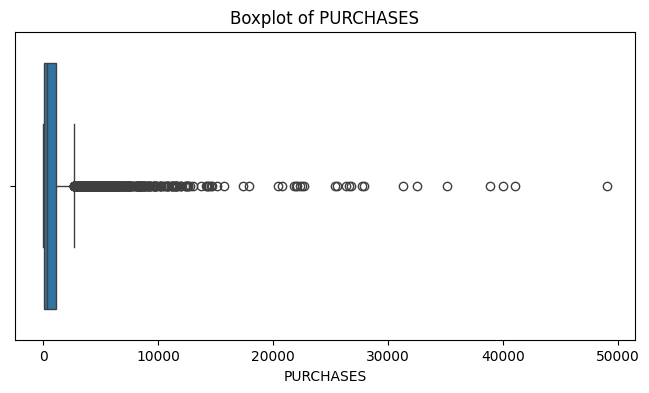

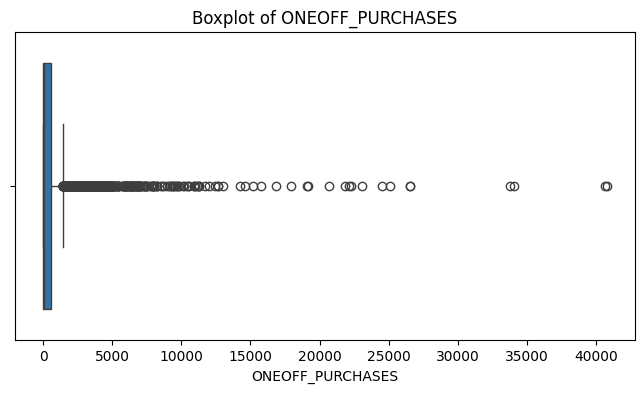

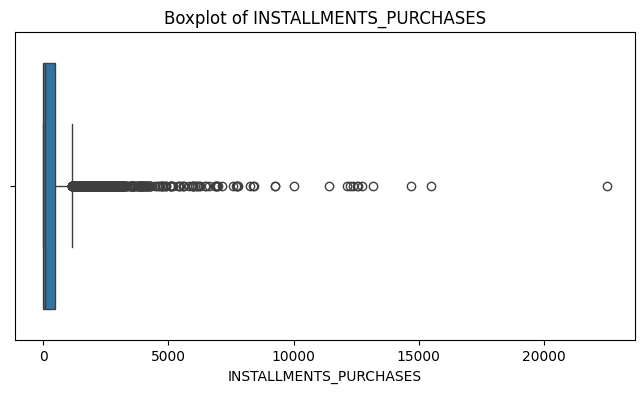

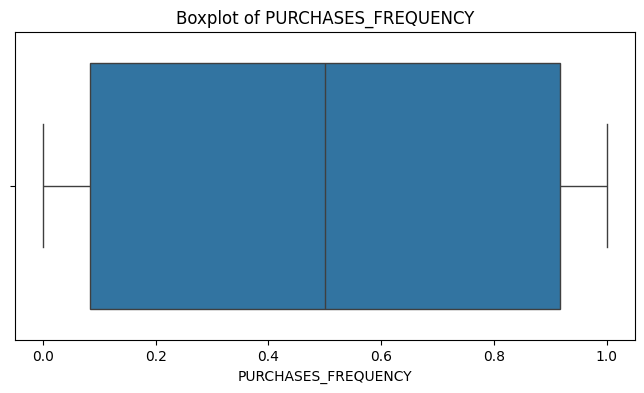

In [46]:
# Visualize each feature with a boxplot to inspect for outliers
for col in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataset_new[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

##### Dealing with outliers by removing them!

In [47]:
Q1 = dataset_new.quantile(0.25)
Q3 = dataset_new.quantile(0.75)
IQR = Q3 - Q1
dataset_no_outliers = dataset_new[~((dataset_new < (Q1 - 1.5 * IQR)) | (dataset_new > (Q3 + 1.5 * IQR))).any(axis=1)]

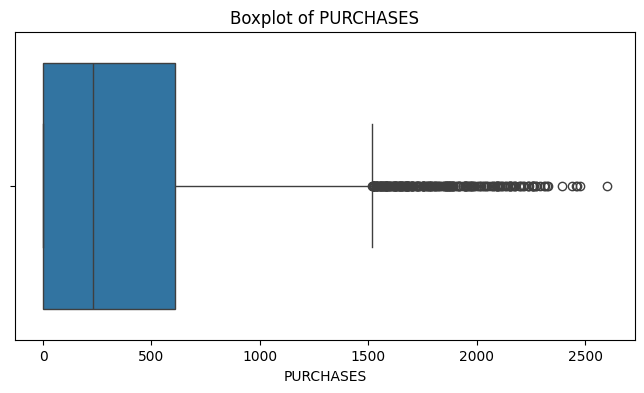

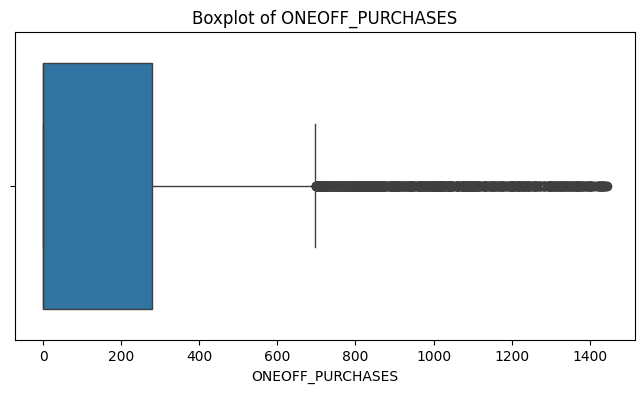

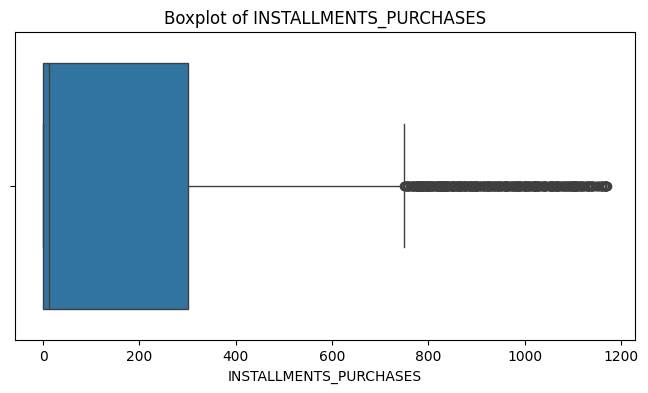

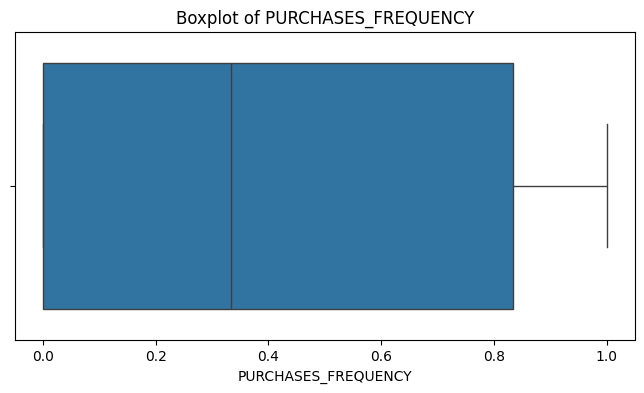

In [48]:
for col in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataset_no_outliers[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

#### K-Means clustering
**Why**: It's efficient and works well with numerical data, especially when clusters are globular and similar in size.  

In [49]:
from sklearn.cluster import KMeans

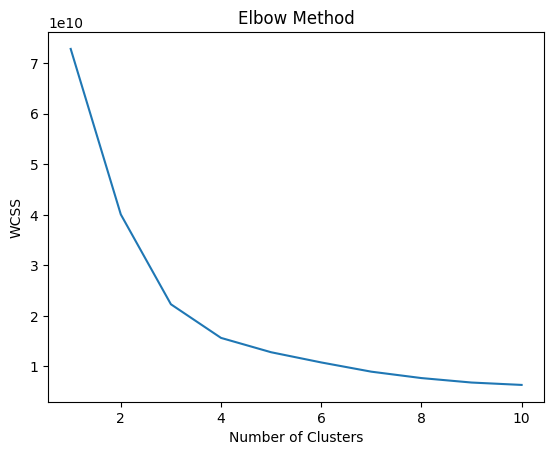

In [50]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(dataset_new)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

> Let's go with **3** as number of clusters based on the Elbow Method!